In [31]:
import os

current_dir = os.getcwd()
datapath = "/home/S113062628/project/chip_llm/systemc_generation/dataset/geek/old_output_datas/two_shot"

list = []

for dir in os.listdir(datapath):
    dir_path = os.path.join(datapath, dir)
    if os.path.isdir(dir_path):
        for file in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file)
            if os.path.isfile(file_path) and file.endswith(".cpp"):
                with open(file_path, "r") as f:
                    code = f.read()
                if "SC_MODULE(Testbench)" in code:
                    list.append(
                        {
                            "task": dir,
                            "testbench": "SC_MODULE(Testbench)"
                            + code.split("SC_MODULE(Testbench)")[1],
                            "module_name": code.split("SC_MODULE(")[1].split(")")[0],
                        }
                    )
list

[{'task': 'AddTwoComplexNumbers',
  'testbench': 'SC_MODULE(Testbench) {\n    sc_signal<int> real1; // Signal for the real part of the first complex number\n    sc_signal<int> imag1; // Signal for the imaginary part of the first complex number\n    sc_signal<int> real2; // Signal for the real part of the second complex number\n    sc_signal<int> imag2; // Signal for the imaginary part of the second complex number\n    sc_signal<int> real_sum; // Signal for the real part of the sum\n    sc_signal<int> imag_sum; // Signal for the imaginary part of the sum\n\n    ComplexAdder adder_inst; // Instance of the ComplexAdder module\n\n    // Constructor\n    SC_CTOR(Testbench) : adder_inst("adder") {\n        // Connect signals to ports\n        adder_inst.real1(real1);\n        adder_inst.imag1(imag1);\n        adder_inst.real2(real2);\n        adder_inst.imag2(imag2);\n        adder_inst.real_sum(real_sum);\n        adder_inst.imag_sum(imag_sum);\n\n        // Process to run tests\n        SC

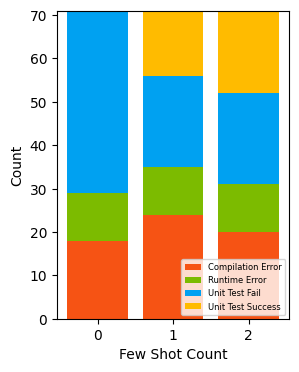

In [25]:
import matplotlib.pyplot as plt

# Few shot 個數
few_shot = [0, 1, 2]

# 各指標的數值
compilation_error = [18, 24, 20]
runtime_error = [11, 11, 11]
unit_test_fail = [42, 21, 21]
unit_test_success = [0, 15, 19]

plt.figure(figsize=(3, 4))

# 將 RGB 色碼換成 0~1 區間的小數，並可在後方加上透明度 alpha
color_orange = (246 / 255, 83 / 255, 20 / 255)  # (橘)
color_green = (124 / 255, 187 / 255, 0 / 255)  # (綠)
color_blue = (0 / 255, 161 / 255, 241 / 255)  # (藍)
color_yellow = (255 / 255, 187 / 255, 0 / 255)  # (黃)

# 第一層：Compilation Error - 橘色
plt.bar(few_shot, compilation_error, label="Compilation Error", color=color_orange)

# 第二層：Runtime Error - 綠色
plt.bar(
    few_shot,
    runtime_error,
    bottom=compilation_error,
    label="Runtime Error",
    color=color_green,
)

# 計算前兩層的累計
bottom_er = [c + r for c, r in zip(compilation_error, runtime_error)]

# 第三層：Unit Test Fail - 藍色
plt.bar(
    few_shot, unit_test_fail, bottom=bottom_er, label="Unit Test Fail", color=color_blue
)

# 計算前三層的累計
bottom_all = [b + f for b, f in zip(bottom_er, unit_test_fail)]

# 第四層：Unit Test Success - 黃色
plt.bar(
    few_shot,
    unit_test_success,
    bottom=bottom_all,
    label="Unit Test Success",
    color=color_yellow,
)

# 加入標題、軸標籤與 legend（設定字體較小）
plt.xlabel("Few Shot Count")
plt.ylabel("Count")
plt.xticks(few_shot)
plt.legend(fontsize=6, loc="lower right")

plt.show()

In [21]:
for item in list:
    task = item.get("task")
    testbench = item.get("testbench")
    print(f"Task: {task}")
    print(f"Testbench: {testbench}")
    print()
    break

Task: AddTwoComplexNumbers
Testbench: SC_MODULE(Testbench) {
    sc_signal<int> real1; // Signal for the real part of the first complex number
    sc_signal<int> imag1; // Signal for the imaginary part of the first complex number
    sc_signal<int> real2; // Signal for the real part of the second complex number
    sc_signal<int> imag2; // Signal for the imaginary part of the second complex number
    sc_signal<int> real_sum; // Signal for the real part of the sum
    sc_signal<int> imag_sum; // Signal for the imaginary part of the sum

    ComplexAdder adder_inst; // Instance of the ComplexAdder module

    // Constructor
    SC_CTOR(Testbench) : adder_inst("adder") {
        // Connect signals to ports
        adder_inst.real1(real1);
        adder_inst.imag1(imag1);
        adder_inst.real2(real2);
        adder_inst.imag2(imag2);
        adder_inst.real_sum(real_sum);
        adder_inst.imag_sum(imag_sum);

        // Process to run tests
        SC_THREAD(run_tests);
    }

    //

In [ ]:
import os
import json

current_dir = os.getcwd()
input_datapath = "/home/S113062628/project/chip_llm/geeksforgeeks"
datapath = "/home/S113062628/project/chip_llm/systemc_generation/dataset/geek/old_output_datas/two_shot"

list = []

for dir in os.listdir(datapath):
    dir_path = os.path.join(datapath, dir)
    if os.path.isdir(dir_path):
        for file in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file)
            if os.path.isfile(file_path) and file.endswith(".cpp"):
                with open(file_path, "r") as f:
                    code = f.read()
                if "SC_MODULE(Testbench)" in code:
                    list.append(
                        {
                            "task": dir,
                            "testbench": "SC_MODULE(Testbench)"
                            + code.split("SC_MODULE(Testbench)")[1],
                            "module_name": code.split("SC_MODULE(")[1].split(")")[0],
                        }
                    )

format = []

for idx, data in enumerate(os.listdir(input_datapath)):
    for item in list:
        task = item.get("task")
        testbench = item.get("testbench")
        module_name = item.get("module_name")
        if task == data.split(".")[0]:
            with open(
                os.path.join(input_datapath, data),
                "r",
            ) as f:
                code = f.read()
                format.append(
                    {
                        "task_id": idx + 1,
                        "task": data,
                        "code": code,
                        "private_test": testbench,
                        "module_name": module_name,
                    }
                )


with open(
    os.path.join(current_dir, "data.json"),
    "w",
) as f:
    json.dump(format, f, indent=4)